In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("gld_price_data.csv")

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
df.set_index('Date', inplace=True)

<AxesSubplot: xlabel='Date'>

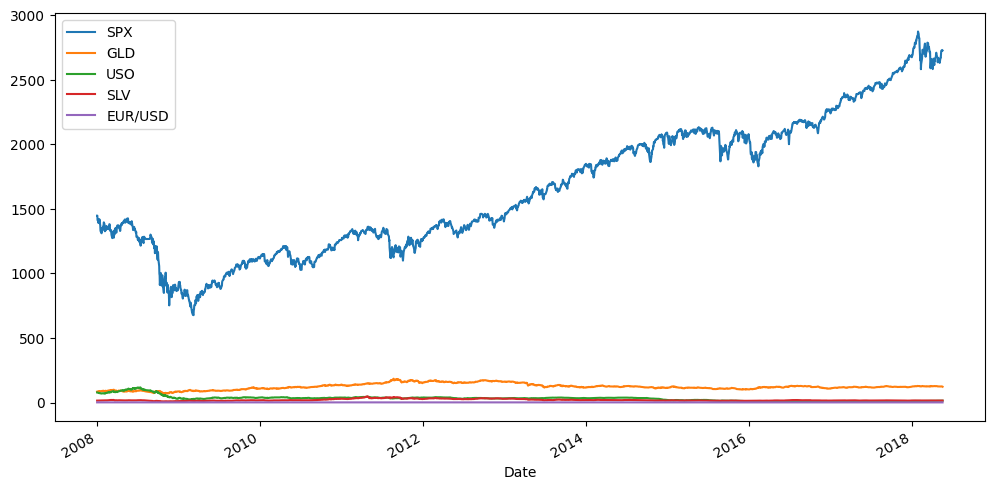

In [7]:
fig, ax = plt.subplots(figsize=(12,6))
df.plot(ax=ax)

<AxesSubplot: xlabel='Date'>

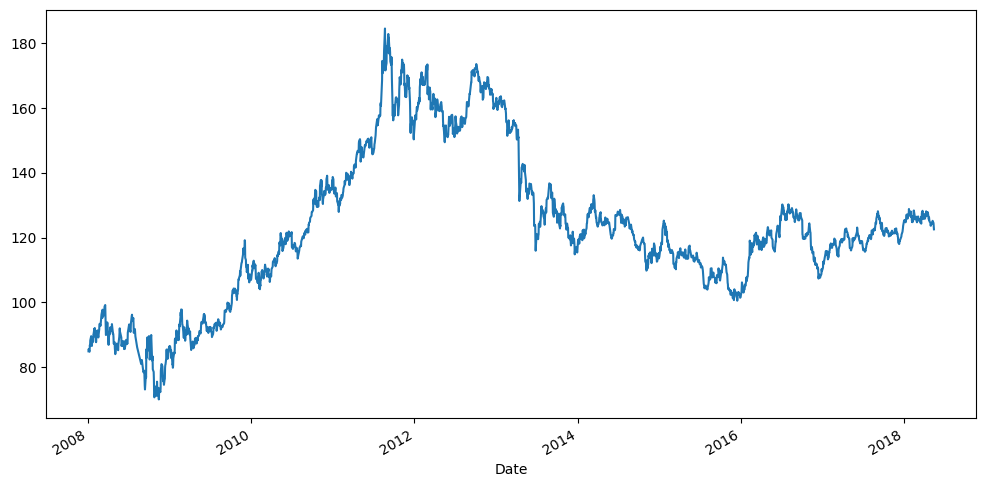

In [8]:
fig, ax = plt.subplots(figsize=(12,6))
df['GLD'].plot(ax=ax)

<AxesSubplot: xlabel='Date'>

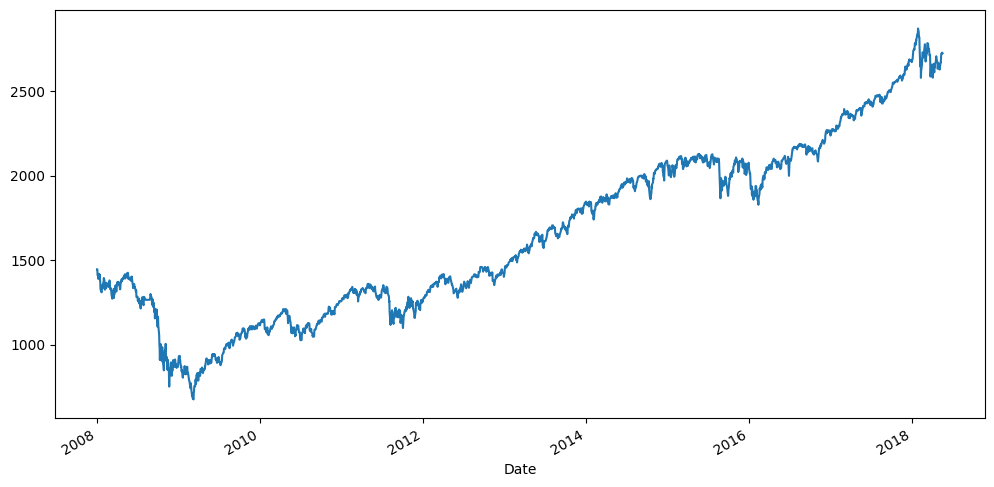

In [9]:
fig, ax = plt.subplots(figsize=(12,6))
df['SPX'].plot(ax=ax)

<AxesSubplot: xlabel='Date'>

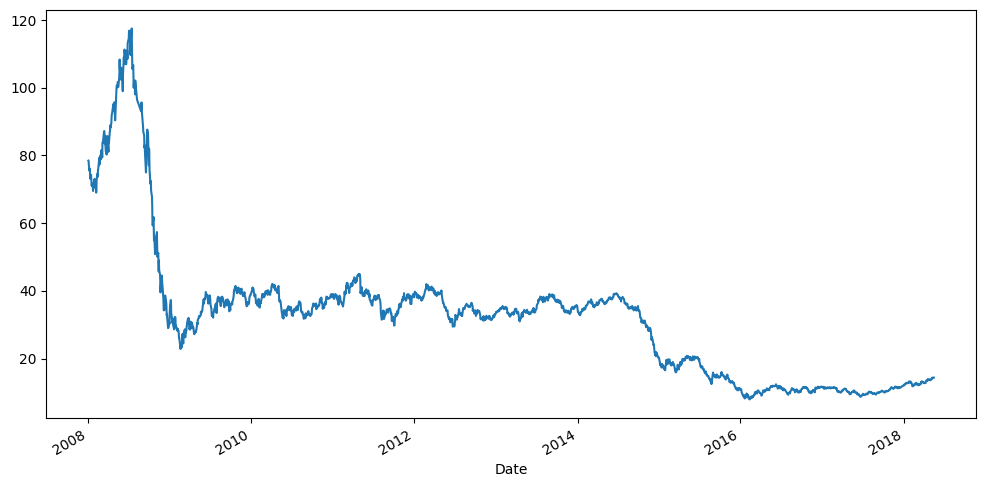

In [10]:
fig, ax = plt.subplots(figsize=(12,6))
df['USO'].plot(ax=ax)

<AxesSubplot: xlabel='Date'>

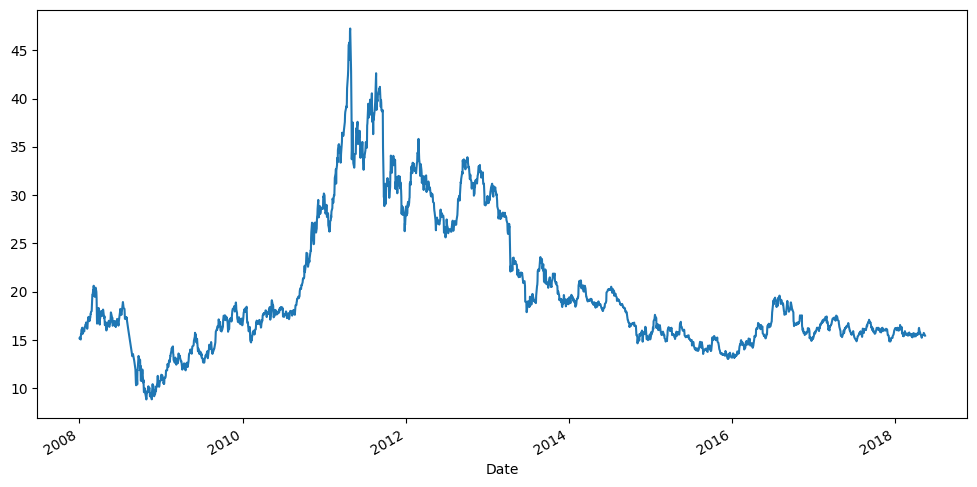

In [11]:
fig, ax = plt.subplots(figsize=(12,6))
df['SLV'].plot(ax=ax)

<AxesSubplot: xlabel='Date'>

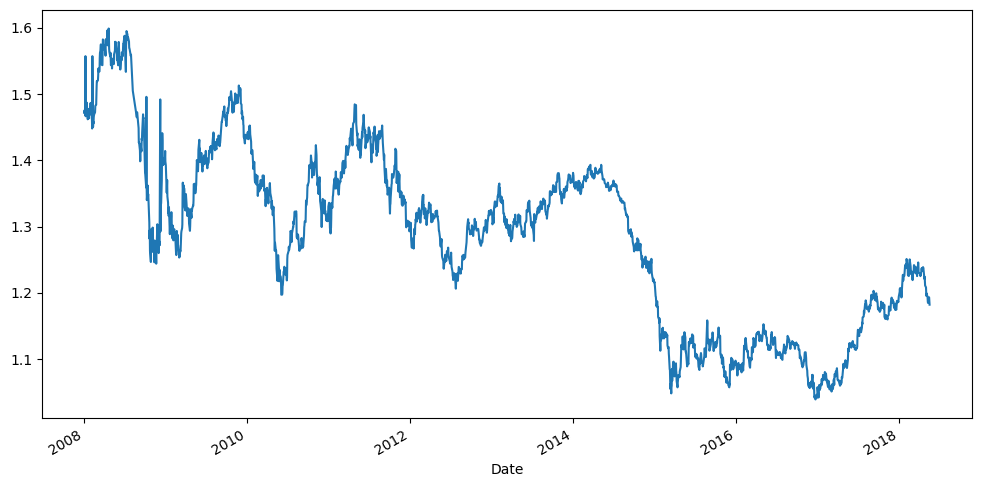

In [12]:
fig, ax = plt.subplots(figsize=(12,6))
df['EUR/USD'].plot(ax=ax)

<AxesSubplot: xlabel='Date'>

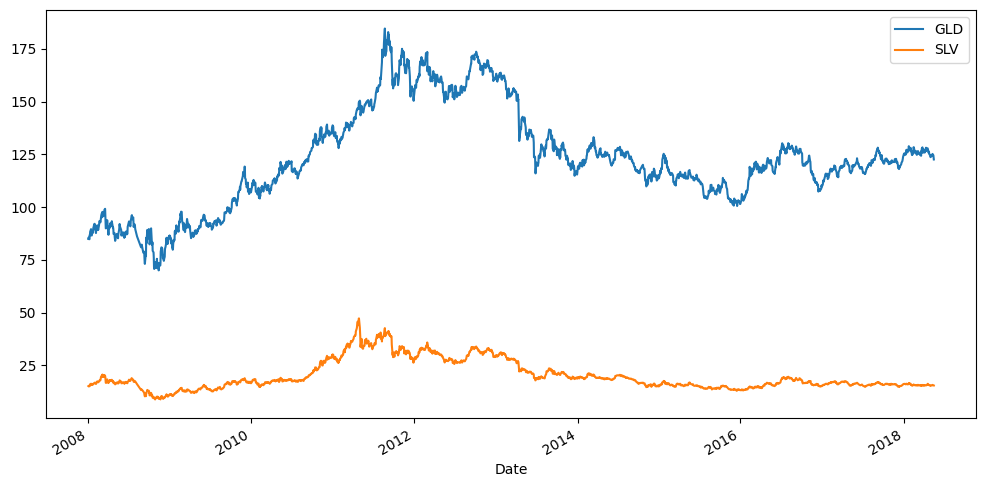

In [13]:
fig, ax = plt.subplots(figsize=(12,6))
df[['GLD', 'SLV']].plot(ax=ax)

In [19]:
X = df.drop('GLD', axis=1)
y = df['GLD']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
from sklearn.metrics import mean_absolute_error

y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Linear Regression: MAE = {}".format(mae))

Linear Regression: MAE = 5.6959006442692885


In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Random Forest Regressor: MAE = {}".format(mae))

Random Forest Regressor: MAE = 1.2602079982096075


In [24]:
from sklearn.svm import SVR

svm = SVR()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Support Vector Machine: MAE = {}".format(mae))

Support Vector Machine: MAE = 16.101974382998606


In [25]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("XGBoost: MAE = {}".format(mae))

XGBoost: MAE = 1.4657916973860963


In [27]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Lasso Regression: MAE = {}".format(mae))

Lasso Regression: MAE = 5.62811928897663


In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}

grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': None, 'n_estimators': 200}
Best cross-validation score: 0.99


In [29]:
y_pred = grid_search.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Random Forest Regressor (Tuned): MAE = {}".format(mae))

Random Forest Regressor (best model): MAE = 1.2272126413318831


In [30]:
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}

grid_search = GridSearchCV(xgb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 7, 'n_estimators': 200}
Best cross-validation score: 0.99


In [31]:
y_pred = grid_search.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("XGBoost (Tuned): MAE = {}".format(mae))

XGBoost (best model): MAE = 1.4364547938131138


Text(0.5, 1.0, 'Gold Price: Actual vs Predicted')

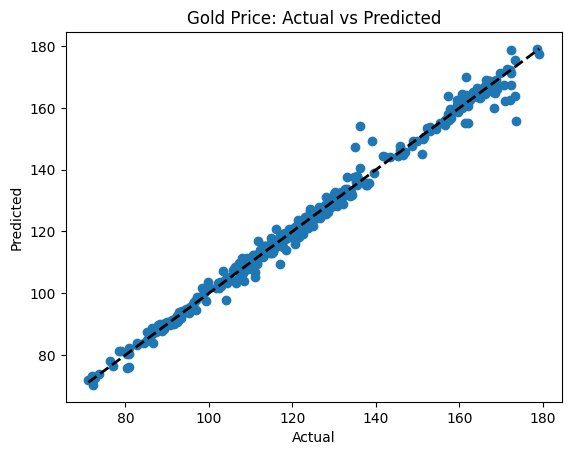

In [32]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gold Price: Actual vs Predicted')